Классифицировать изображения букв в 10 классов

Задача: классифицировать изображения букв из набора notMNIST на 10 классов с использованием KNN и визуализацией t-SNE для кластеров.

Загрузка данных:

Для загрузки данных использовалась библиотека PyTorch

In [ ]:
import torch
import matplotlib.pyplot as plt

loaded_data = torch.load('notMNIST.pt', weights_only=True)

dataset_tensor = loaded_data['images']
labels_tensor = loaded_data['labels']

plt.imshow(dataset_tensor[6, :, :])
plt.show()

t-SNE (t-Distributed Stochastic Neighbor Embedding)

Принцип работы:

t-SNE — это метод для понижения размерности данных с сохранением локальной структуры. Хорошо подходит для визуализации многомерных данных. В данном случае понижает размерность данных с 784 (28*28 пикселей) признака → 2D, что позволяет визуализировать кластеры. Метод предоставил модуль sklearn.manifold

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
images_tsne = tsne.fit_transform(images_sample)

# Визуализация кластеров t-SNE
plt.figure(figsize=(10, 8))
scatter = plt.scatter(images_tsne[:, 0], images_tsne[:, 1], c=labels_sample, cmap='tab10', s=10)
plt.legend(*scatter.legend_elements(), title="Классы")
plt.title("Визуализация t-SNE на notMNIST")
plt.xlabel("Первая компонента")
plt.ylabel("Вторая компонента")
plt.show()

KNN (K-Nearest Neighbors)
Принцип работы:
KNN классифицирует объект по классам его ближайших соседей в пространстве признаков.

Преимущества:
Простота реализации
Эффективен на небольших выборках
Гиперпараметр k: Количество соседей.

Тренировочная выборка 20%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

Использовался класс KNeighborsClassifier из модуля sklearn.neighbors.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Оценка точности и матрица ошибок:

In [ ]:
# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность KNN: {accuracy:.4f}")

# Матрица ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.title("Матрица ошибок KNN")
plt.xlabel("Предсказанные метки")
plt.ylabel("Истинные метки")
plt.show()

Исходные данные:

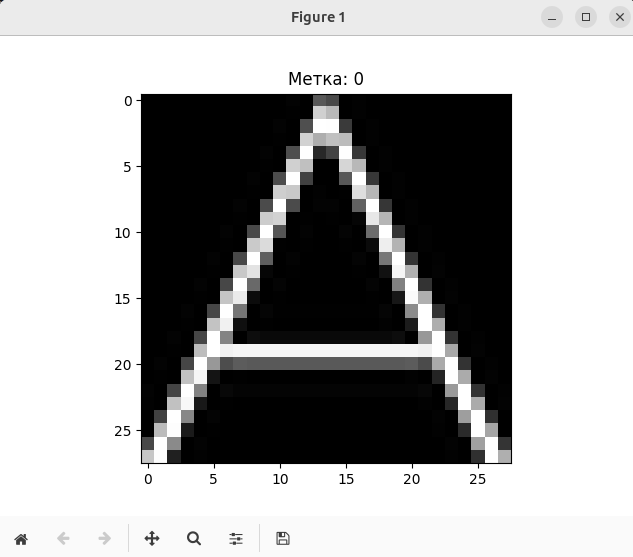

Визуализация t-SNE:

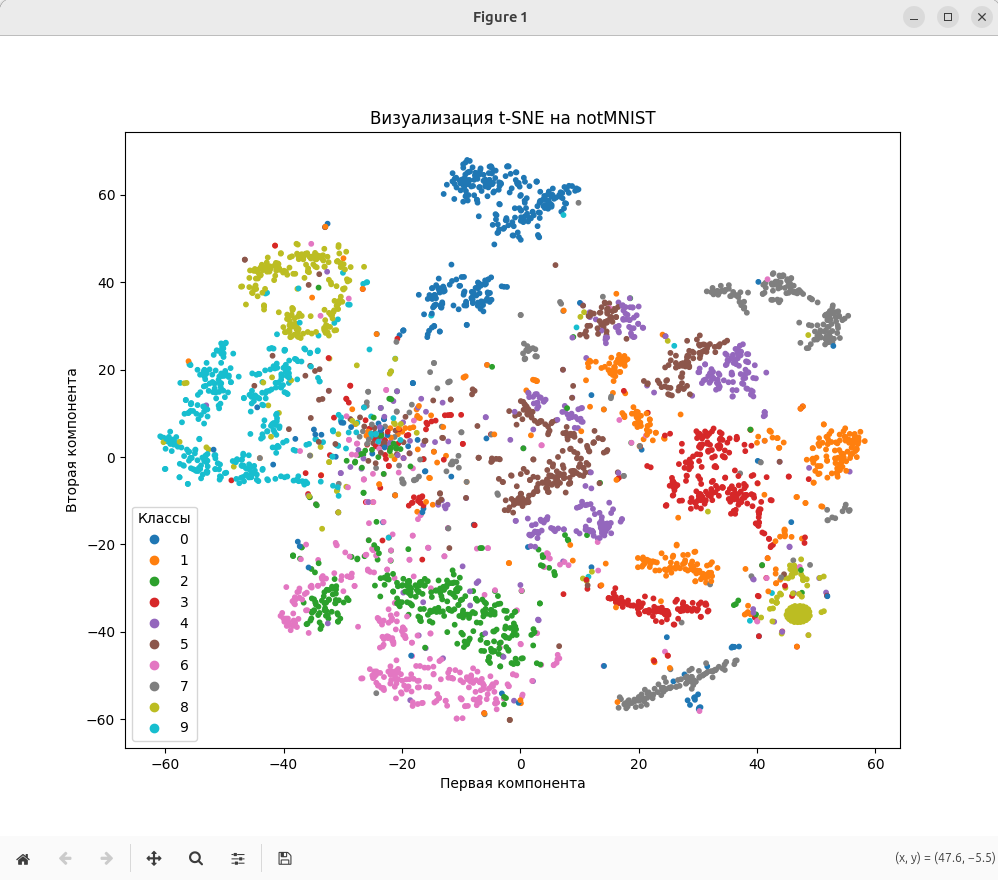

Результаты KNN:

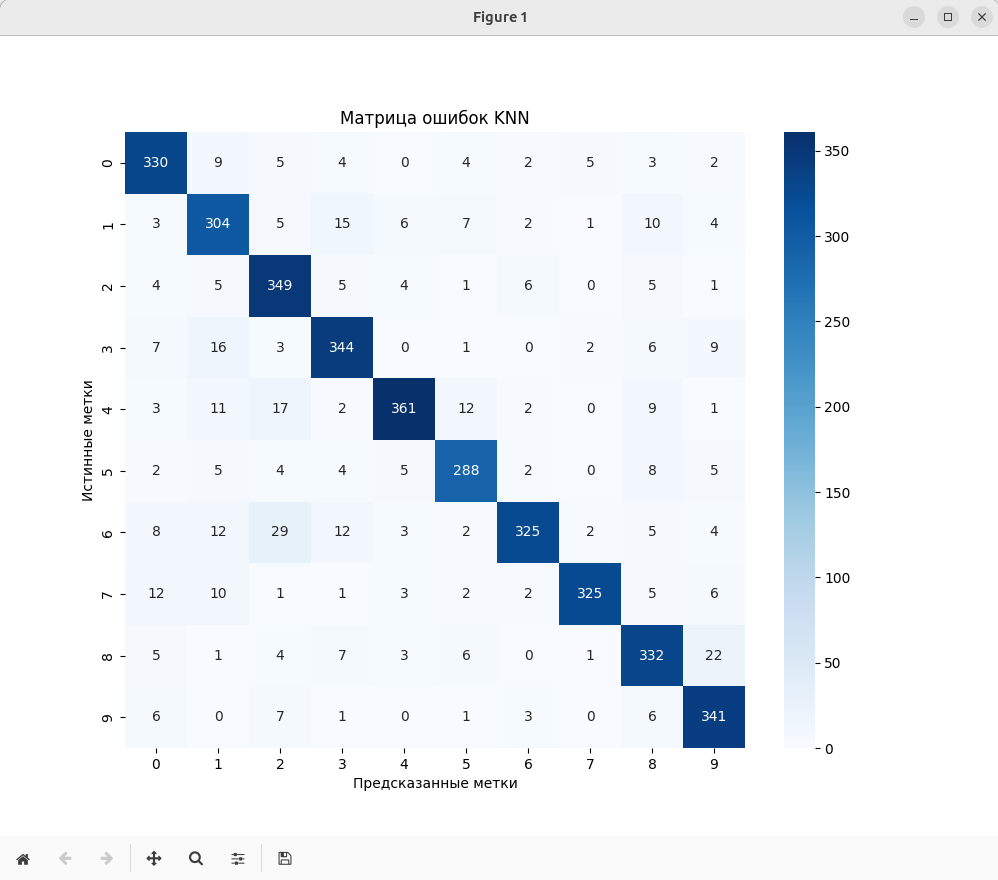

Точность KNN: 0.8809